#  <span style="color:#3D6AF2; text-align: center;">CLASSIFICATION TREES - ÁRBOLES DE CLASIFICACIÓN</span>

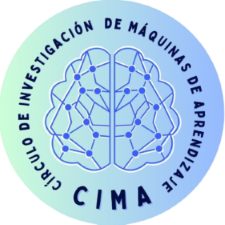

### <span style="color:#486CD9; text-align: center;">Alumna: Carla Andrea Chavez Paucar</span>

<p style="font-size: 16px;">Los árboles de clasificación son una técnica de aprendizaje supervisado, utilizada para predecir la <strong>clase o categoría</strong> de una variable objetivo basada en varias variables de entrada. Su estructura jerárquica divide los datos en subconjuntos basándose en criterios de decisión, representados en nodos y ramas, hasta llegar a una conclusión en los nodos hoja, donde se asigna la clase final. Los árboles de clasificación son intuitivos y fáciles de interpretar, ya que simulan un proceso de toma de decisiones en pasos secuenciales

##  <span style="color:#3D6AF2; text-align: center;">Caso de estudio</span>

<p style="font-size: 16px;"> En este estudio, utilizaremos un conjunto de datos del Curated Microarray Database (CuMiDa) que contiene información sobre la expresión génica de 54,677 genes en 151 muestras, las cuales representan cinco tipos diferentes de cáncer de mama, además de tejido sano. Nuestro objetivo es aplicar un árbol de clasificación para predecir el tipo de cáncer basándonos en los niveles de expresión génica. Este enfoque nos permitirá explorar las características distintivas de cada tipo de cáncer y evaluar el rendimiento del modelo a través de métricas como la precisión, la matriz de confusión y el informe de clasificación. A través de este análisis, buscaremos no solo clasificar correctamente las muestras, sino también identificar patrones relevantes en los datos que podrían contribuir a un mejor entendimiento de la biología del cáncer de mama. La visualización del árbol de decisión nos proporcionará una interpretación clara de cómo se toman las decisiones en el modelo.


[Datos disponibles aquí](https://www.kaggle.com/datasets/brunogrisci/breast-cancer-gene-expression-cumida)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
# Lectura de datos
data = pd.read_csv("Breast_GSE45827.csv")
print(data.head())

   samples   type  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0       84  basal   9.850040  8.097927  6.424728  7.353027   3.029122   
1       85  basal   9.861357  8.212222  7.062593  7.685578   3.149468   
2       87  basal  10.103478  8.936137  5.735970  7.687822   3.125931   
3       90  basal   9.756875  7.357148  6.479183  6.986624   3.181638   
4       91  basal   9.408330  7.746404  6.693980  7.333426   3.169923   

    1294_at   1316_at   1320_at  ...  AFFX-r2-Ec-bioD-3_at  \
0  6.880079  4.963740  4.408328  ...             12.229711   
1  7.542283  5.129607  4.584418  ...             12.178531   
2  6.562369  4.813449  4.425195  ...             12.125108   
3  7.802344  5.490982  4.567956  ...             12.111235   
4  7.610457  5.372469  4.424426  ...             12.173642   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0             11.852955            13.658701            13.477698   
1             11.809408            13.750086      

In [3]:
# Verificar valores nulos
print(data.isnull().sum())

samples            0
type               0
1007_s_at          0
1053_at            0
117_at             0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54677, dtype: int64


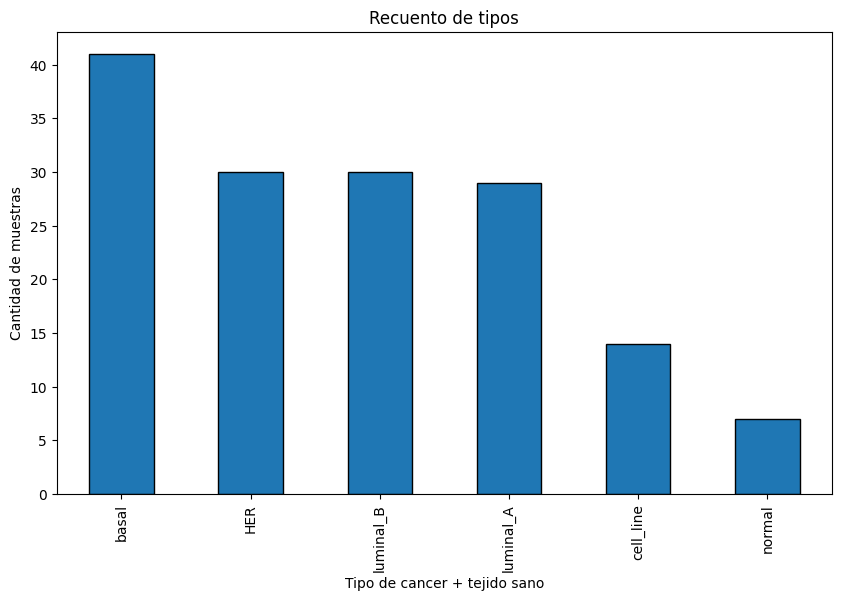

In [4]:
# Gráfico de barras para el recuento de tipos de cancer / tejido sano
plt.figure(figsize=(10, 6))
data['type'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Recuento de tipos')
plt.xlabel('Tipo de cancer + tejido sano')
plt.ylabel('Cantidad de muestras')
plt.show()

In [5]:
data['type'].value_counts()

type
basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: count, dtype: int64

<p style="font-size: 16px;"> Las clases 'normal' y 'cell_line' están subrepresentadas en el conjunto de datos y generan un desbalance significativo

In [6]:
# Filtrar los datos para eliminar filas donde el tipo es 'normal' o 'cell_line'
data = data[~data['type'].isin(['normal', 'cell_line'])]

In [7]:
# Separar características (variables predictoras) y etiqueta (valor target)
X = data.drop(columns=["samples", "type"])  # Elimina la columna irrelevante, "id"
y = data["type"]

In [8]:
# División de los datos en Conjuntos de Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###  <span style="color:#3D6AF2; text-align: center;">Crear y entrenar el modelo</span>

In [9]:
# CreaR el modelo
clf = DecisionTreeClassifier(random_state=42, criterion='gini')

<p style="font-size: 16px;">
<strong>criterion='gini':</strong>    Define el criterio de evaluación de las divisiones en el árbol. Se utiliza el índice de Gini, una medida de pureza que ayuda a seleccionar la mejor división en cada nodo del árbol. Alternativamente, se podría usar 'entropy' para el cálculo de la ganancia de información.

In [10]:
# Entrenamiento del modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

<p style="font-size: 16px;">
Durante el entrenamiento, el modelo aprende a dividir los datos basándose en las características de X_train y los valores de y_train, optimizando la estructura del árbol de decisión para realizar predicciones sobre nuevos datos con características similares.

###  <span style="color:#3D6AF2; text-align: center;">Predicciones y cálculo de precisión</span>

In [11]:
# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test) # predicciones sobre el conjunto de prueba (X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.3f}")

Precisión del modelo: 0.872


###  <span style="color:#3D6AF2; text-align: center;">Informe de clasificación y matriz de confusión</span>

In [12]:
# Generar informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

Informe de clasificación:
              precision    recall  f1-score   support

         HER       0.83      1.00      0.91        10
       basal       1.00      0.79      0.88        14
   luminal_A       0.75      1.00      0.86         9
   luminal_B       1.00      0.67      0.80         6

    accuracy                           0.87        39
   macro avg       0.90      0.86      0.86        39
weighted avg       0.90      0.87      0.87        39



<p style="font-size: 16px;"> 
<strong>PARA PRECISIÓN:</strong>

<p style="font-size: 16px;">   
<strong>HER:</strong> 0.83, el modelo predijo correctamente el 83% de los casos clasificados como HER, es decir, el 17% de las predicciones que hizo como HER eran en realidad de otra clase.

<p style="font-size: 16px;">
<strong>basal:</strong> 1.00, predijo todos los casos de esta clase correctamente, lo que significa que el modelo no cometió errores en las predicciones de esta clase.

<p style="font-size: 16px;">
<strong>luminal_A:</strong> 0.75, el modelo predijo correctamente el 75% de los casos clasificados como luminal_A; esto indica que el 25% de las predicciones para esta clase fueron incorrectas y pertenecían a otra clase.

<p style="font-size: 16px;">
<strong>luminal_B:</strong> 1.00, el modelo predijo correctamente el 100% de los casos clasificados como luminal_B, sin ningún error en las predicciones de esta clase.
    
<p style="font-size: 16px;">    
<strong>PARA Recall (Sensibilidad):</strong> Indica la capacidad del modelo para identificar correctamente las instancias de cada clase.

<p style="font-size: 16px;">   
<strong>HER:</strong> 1.00, el modelo detectó todos los casos reales de HER
    
<p style="font-size: 16px;">
<strong>basal:</strong> 0.79, capturó el 79% de los casos reales de basal
    
<p style="font-size: 16px;">
<strong>luminal_A:</strong> 1.00, el modelo detectó todos los casos reales de luminal_A.
    
<p style="font-size: 16px;">
<strong>luminal_B:</strong> 0.67, detectó el 67% de los casos reales de luminal_B.
    

<p style="font-size: 16px;">
<strong>F1-Score:</strong>  Es una métrica combinada que toma en cuenta tanto la precisión como el recall, útil para evaluar el rendimiento general.


In [13]:
# matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Matriz de confusión:
[[10  0  0  0]
 [ 2 11  1  0]
 [ 0  0  9  0]
 [ 0  0  2  4]]


<p style="font-size: 16px;"> En la matriz, las filas representan las clases reales y las columnas las clases predichas, facilitando la identificación de patrones de error específicos.

<p style="font-size: 16px;">
El modelo predice bien las clases HER y luminal_A, con una clasificación perfecta en ambas.
La clase basal muestra algunos errores, con 2 instancias clasificadas incorrectamente como HER y 1 en luminal_A.
La clase luminal_B tiene algunos errores de clasificación, con instancias 2 confundidas con luminal_A, lo que indica una menor precisión para esta clase.

###  <span style="color:#3D6AF2; text-align: center;"> Visualización el árbol de decisión</span>

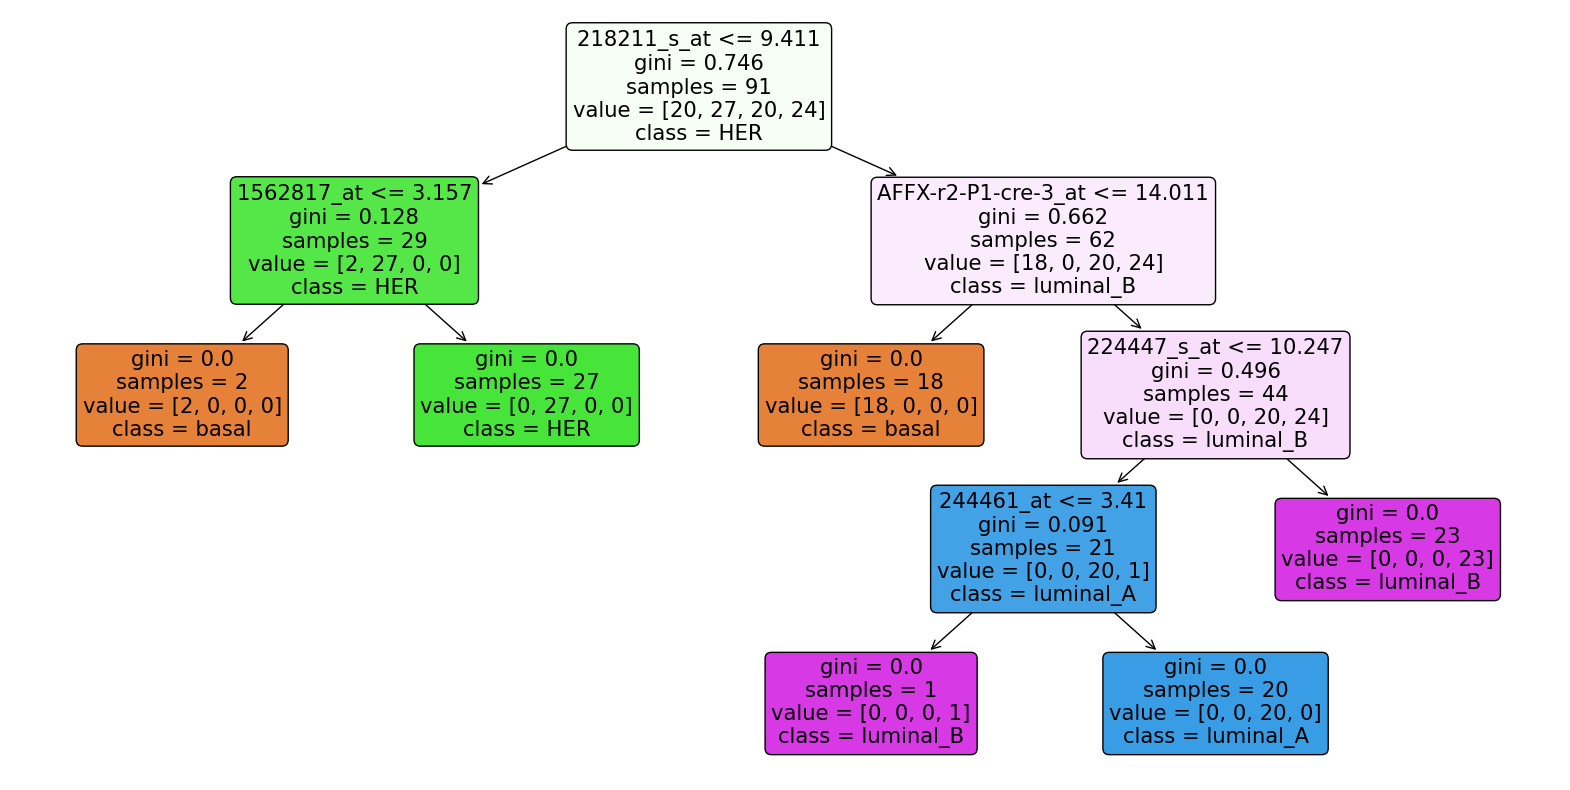

In [14]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=y.unique(), rounded=True)
plt.show()

<p style="font-size: 16px;"> Cada nodo representa una decisión basada en el valor de una característica específica, y el proceso continúa hasta llegar a las hojas (nodos finales) que indican la clase predicha
    
<p style="font-size: 16px;">
El valor de gini en cada nodo muestra el índice de Gini, que mide la impureza. Valores de Gini más bajos indican mayor pureza en la distribución de clases en ese nodo. 0 <= gini <= 1
    
<p style="font-size: 16px;">
Este árbol es capaz de clasificar las muestras con alta pureza en las hojas, donde el índice de Gini es 0 en la mayoría de los casos, lo que indica una clara separación de clases en estos nodos finales.